# Nguyễn Thị Kiều Nhung 11203041

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [81]:
class LinearRegression:
    
    def __init__(self, degree):
        self._degree = degree #poly func
        
    def transformX(self, x):
        self._x_original = x.reshape(-1,1)
        self._X = np.ones((x.shape[0],1))
        
        # Adding columns
        for i in range(1, self._degree + 1):
            self._X = np.hstack((self._X, self._x_original ** i))
        return self._X
    
    def fit(self, x, y):
        self._X = self.transformX(x)
        self._y = y
        
        a = np.dot(self._X.T, self._X)
        b = np.dot(self._X.T, self._y)
        self._w = np.dot(np.linalg.inv(a),b)
        
    def coefficient(self):
        return self._w
    
    def predict(self, x):
        return np.dot(self._X, self._w)
    
    def plot_model(self):
        x = np.linspace(min(self._x_original),max(self._x_original), 100)
        plt.plot(x, self.predict(self.transformX(x)), 'r')
        

# EX1: Fit model parabol linear regression for data https://github.com/nttuan8/DL_Tutorial/master/L1/data_square.csv

In [83]:
data = pd.read_csv("https://raw.githubusercontent.com/nttuan8/DL_Tutorial/master/L1/data_square.csv").values
data


array([[  30.    , -100.    ],
       [  32.4138, -190.725 ],
       [  34.8276, -269.798 ],
       [  37.2414, -337.218 ],
       [  39.6552, -392.985 ],
       [  42.069 , -437.099 ],
       [  44.4828, -469.56  ],
       [  46.8966, -490.369 ],
       [  49.3103, -499.524 ],
       [  51.7241, -497.027 ],
       [  54.1379, -482.878 ],
       [  56.5517, -457.075 ],
       [  58.9655, -419.62  ],
       [  61.3793, -370.511 ],
       [  63.7931, -309.75  ],
       [  66.2069, -237.337 ],
       [  68.6207, -153.27  ],
       [  71.0345,  -57.5505],
       [  73.4483,   49.8216],
       [  75.8621,  168.847 ],
       [  78.2759,  299.524 ],
       [  80.6897,  441.855 ],
       [  83.1034,  595.838 ],
       [  85.5172,  761.474 ],
       [  87.931 ,  938.763 ],
       [  90.3448, 1127.71  ],
       [  92.7586, 1328.3   ],
       [  95.1724, 1540.55  ],
       [  97.5862, 1764.45  ],
       [ 100.    , 2000.    ]])

In [84]:
data.shape

(30, 2)

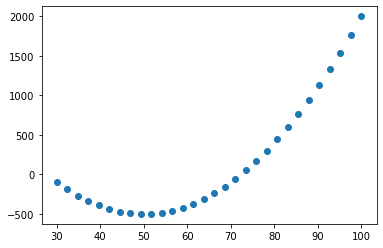

In [85]:
# Plot data

x = data[:, 0].reshape(-1, 1) #(30,1)
y = data[:, 1].reshape(-1, 1)
plt.scatter(x, y)


In [86]:
ex1 = LinearRegression(2)
ex1.fit(x,y)
ex1.coefficient()

array([[ 2.00000579e+03],
       [-1.00000222e+02],
       [ 1.00000199e+00]])

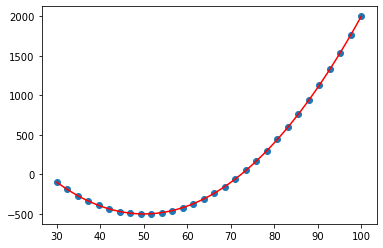

In [87]:
ex1.plot_model()
plt.scatter(x,y)

# EX2: 

In [88]:
# generate data

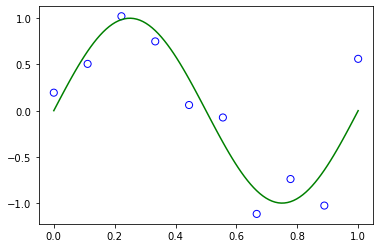

In [94]:
import random
random.seed(12345)
def func(x):
    return np.sin(2 * np.pi * x)

def generate_data(func, n, std):
    x = np.linspace(0, 1, n)
    t = func(x) + np.random.normal(0, std, x.shape)
    return x, t

x_train, y_train = generate_data(func, 10, 0.25)
x_test = np.linspace(0, 1, 100)
y_test = func(x_test)

plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50)
plt.plot(x_test, y_test, c="g")
plt.show()

# a. Fit polynomial has a degree of 0, 1, 3, 6, 9, plot model and comment

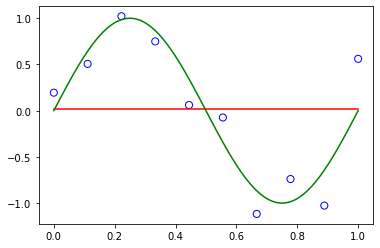

In [100]:
# BAC 0
x = np.linspace(0, 1, 100)
y = np.sin(2*np.pi*x)
model0 = LinearRegression(0)
model0.fit(x_train, y_train)
plt.scatter(x_train, y_train,facecolor='None', edgecolor='b',s = 50)
model0.plot_model()
plt.plot(x,y,c='g')

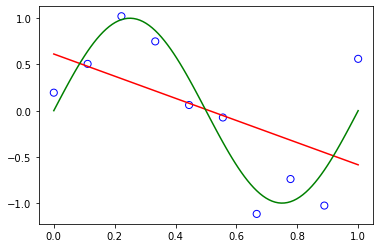

In [101]:
# BAC 1
model1 = LinearRegression(1)
model1.fit(x_train, y_train)
plt.scatter(x_train, y_train, facecolor='None', edgecolor='b', s=50)
model1.plot_model()
plt.plot(x, y, c='g')

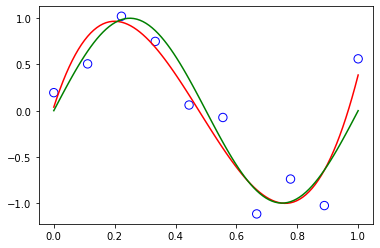

In [102]:
# BAC3
model3 = LinearRegression(3)
model3.fit(x_train, y_train)
plt.scatter(x_train, y_train, 70, facecolor='None', edgecolor='b')
model3.plot_model()
plt.plot(x, y, c='g')

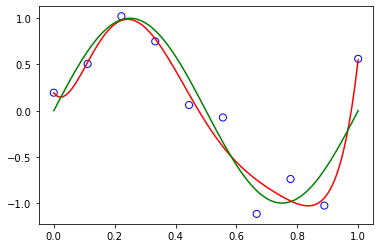

In [105]:
# BAC6
model6 = LinearRegression(6)
model6.fit(x_train, y_train)
plt.scatter(x_train, y_train, facecolor='None', edgecolor='b', s = 50)
model6.plot_model()
plt.plot(x, y, c='g')

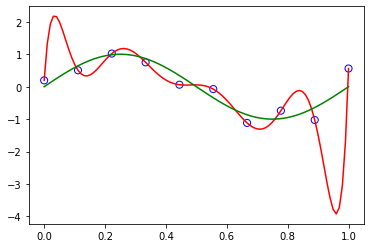

In [104]:
# BAC 9
model9 = LinearRegression(9)
model9.fit(x_train, y_train)
plt.scatter(x_train, y_train,facecolor='None', edgecolor='b', s= 50)
model9.plot_model()
plt.plot(x, y, c='g')

degree = 0: mô hình là một đường thẳng (//Ox), fit được rất ít điểm, underfitting

degree = 1: dạng y = ax + b, fit được nhiều điểm hơn so với loại trước, tuy nhiên loss vẫn cao --> underfitting

degree = 3: dạng đa thức bậc 3, khá trùng khớp với đường sin(2pi*x) --> ok

degree = 6: mô hình có dạng đa thức bậc cao nhất là 6, hầu như fit với các điểm dữ liệu, ok, gần overfitting 

degree = 9: mô hình dạng đa thức bậc 9, fit hoàn toàn với các điểm dữ liệu, --> overfitting

==> degree = 3 và degree = 6  ok hơn, loss thấp

==> phải chọn sẽ chọn degree = 3 vì đơn giản hơn

#  b. Generate 15 and 100 more data points for polynomial has a degree of 9

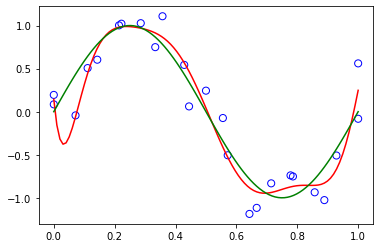

In [106]:
x_more, y_more = generate_data(func, 15, 0.25)
x_train_1 = np.concatenate((x_train, x_more), axis=0)
y_train_1 = np.concatenate((y_train, y_more), axis=0)
model9.fit(x_train_1, y_train_1)
plt.scatter(x_train_1, y_train_1,facecolor='None', edgecolor='b', s= 50)
model9.plot_model()
plt.plot(x, y, c='g')

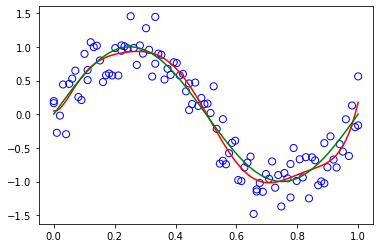

In [107]:
x_more, y_more = generate_data(func, 100, 0.25)
x_train_1 = np.concatenate((x_train, x_more), axis=0)
y_train_1 = np.concatenate((y_train, y_more), axis=0)
model9.fit(x_train_1, y_train_1)
plt.scatter(x_train_1, y_train_1,facecolor='None', edgecolor='b', s= 50)
model9.plot_model()
plt.plot(x, y, c='g')

In [108]:
# When more added data, overfitting is reduced 

In [ ]:
#  Ridge Regression and Lasso Regression
class RidgeRegression:
  def __init__(self, degree, alpha):
    self._degree = degree
    self._alpha = alpha

  def transform_X(self, x):
    self._x_original = x.reshape(-1, 1)
    self._X = np.ones((x.shape[0], 1))

    # Add x^i columns to x
    for i in range(1, self._degree + 1):
      self._X = np.hstack((self._X, self._x_original**i))
    return self._X
  
  def fit(self, x, y):
    self._X = self.transform_X(x)
    self._Y = y
    I = np.identity(self._X.shape[1])
    I[0][0] = 0                      
    # Calculate w
    A = np.dot(self._X.T, self._X) + self._alpha * I
    b = np.dot(self._X.T, self._Y)
    self._W = np.dot(np.linalg.inv(A), b)
    
  def coef(self):
    return self._W
  
  def predict(self, x):
    return np.dot(self._X, self._W)
  
  def plot_model(self):
    x = np.linspace(float(min(self._x_original)), float(max(self._x_original)), 100)
    plt.plot(x, self.predict(self.transform_X(x)), 'g')

In [ ]:
RG = RidgeRegression(9, 0.000001)
RG.fit(x_train, y_train)
plt.scatter(x_train, y_train, 70, facecolor='None', edgecolor='b')
RG.plot_model()
plt.plot(x, y, c='r')

In [ ]:
# Lasso Regression 
class LassoRegression() :  
    def __init__(self, degree, learning_rate, iterations, l1_penality):    
        self._degree = degree
        self._learning_rate = learning_rate    
        self._iterations = iterations    
        self._l1_penality = l1_penality

    def transform_X(self, x):
        self._x_original = x.reshape(-1, 1)
        self._X = np.ones((x.shape[0], 1))

        # Add x^i columns to x
        for i in range(1, self._degree + 1):
          self._X = np.hstack((self._X, self._x_original**i))
        return self._X
          
    def fit(self, X, Y) :  
        self._X = self.transform_X(X)   
        self._Y = Y    
            
        self._m, self._n = self._X.shape        
        # weight initialization      
        self._W = np.zeros(self._n)  
        self._b = 0  

        # gradient descent             
        for i in range(self._iterations):        
            self.update_weights()    
        return self
      
       
    def update_weights(self) :          
        Y_pred = self.predict(self._X)
      
        # calculate gradients       
        dW = np.zeros(self._n)     
        for j in range(self._n):     
            if self._W[j] > 0:            
                dW[j] = (-(2 * (self._X[:, j]).dot(self._Y - Y_pred )) + self._l1_penality)/self._m
            else :         
                dW[j] = (-(2 * (self._X[:, j]).dot(self._Y - Y_pred)) - self._l1_penality)/self._m    
        db = - 2 * np.sum(self._Y - Y_pred )/self._m 
          
        # update weights 
        self._W = self._W - self._learning_rate * dW  
        self._b = self._b - self._learning_rate * db
    
        return self
      
    def predict(self, X) :    
        return X.dot(self._W) + self._b
    
    def plot_model(self):
      x = np.linspace(float(min(self._x_original)), float(max(self._x_original)), 100)
      plt.plot(x, self.predict(self.transform_X(x)), 'r')

In [ ]:
Lasso = LassoRegression(9, 0.01, 10000, 0.000001)
Lasso.fit(x_train, y_train)
plt.scatter(x_train, y_train, 70, facecolor='None', edgecolor='b')
Lasso.plot_model()
plt.plot(x, y, c='g')

In [ ]:
#Adding ridge and lasso